In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
from pathlib import Path
import glob
import itertools
import matplotlib.animation as ani
import os
import BeginnersGraphs as ev

**The original code output is in Giga Kelvin (GK), Hannah's editted version of the code outputs in MeV already so there's no need to convert once you're running this using her's. If you're running the original code then apply this function to the temperature column, this can be done by uncommenting the 'df['T (MeV)'] = df['T (MeV)'].apply(lambda x: GK_to_MeV(x))' left in the part of the code below working with the dataframe.**

In [2]:
def GK_to_MeV(k):
    kelvin = k*(10**9)
    MeV = kelvin*8.61732814974493e-11
    return MeV

def kg_to_MeV(k):
    MeV = k*5.6095861672249e29
    return MeV

In [3]:
def delete_file(file):
    check_file = Path(file)

    if check_file.is_file():
            os.remove(check_file) 

## Enter your file directory for what you'd like to run in the line below
**For Mac computers it seems like you can enter the shorthand whereas with Windows it seems to need the full directory, enter the directory in which you'd like to execute the file in the 'run_directory' below:**

In [4]:
#ev.clean_directory('C:/Users/kathr/Chad_Research_Neutrinos/alterbbn_v2.2', 'alter_eta_edit.c')

In [5]:
#delete_file("evolution.out") 

**Enter the directory your alter_eta_edit.c file can be found in in the variable 'directory' below:**

In [6]:
def eta_element_string(eta_value, run_directory):
    ev.clean_directory('C:/Users/kathr/Chad_Research_Neutrinos/alterbbn_v2.2', 'alter_eta_edit.c')
    delete_file("evolution.out") 
    #eta_values = [low_value, med_value, high_value] #enter whatever eta values you want to go through here 
    
    c=0
    a = []
    #dict = ['Time(s)', 'a', 'T(MeV)', 'Tnu (GK)', 'Photons', 'Baryons', 'Neutrinos', 'Phi (GeV^4)', 'Y(n)', 'Y(p)', 'Y(2H)', 'Y(4He)', 'Y(7Li)', 'Y(Be7)', 'eta']

    #print(os.getcwd())

    #for i in eta_values:
        #print(i)
    d = subprocess.run([run_directory, str(eta_value)], capture_output = True, text = True, shell = True)
    print(d.stderr)

    check_file = Path("evolution.out")

    if check_file.is_file():
        #print('there is a file!')
        text = open('evolution.out', "r").readlines()

        aa = text[0]
        dict_temp = aa.split(',')
        dict_temp = [x.strip(' ') for x in dict_temp]
        #print(dict_temp)

        df = pd.DataFrame(columns = dict_temp)
        #print(df)
        for i in range(1, len(text)):
            a = text[i]
            b = a.split(',')
            df.loc[i] = b

        df = df.replace({'\n':''},regex=True)
        df = df.apply(pd.to_numeric)
        #df['T (MeV)'] = df['T (MeV)'].apply(lambda x: GK_to_MeV(x))  ##for running original code and getting MeV outputs

        #if c == 0:
        temperature_str = df['T (MeV)'].to_numpy()
        Y_n_str = df['Y(n)'].to_numpy()
        Y_p_str = df['Y(p)'].to_numpy()
        Y_2H_str = df['Y(2H)'].to_numpy()
        Y_4He_str = df['Y(4He)'].to_numpy()
        Y_7Li_str = df['Y(7Li)'].to_numpy()
        Y_Be7_str = df['Y(7Be)'].to_numpy()
            #print('made to low')

        #if c == 1:
            #temperature_str_med = df['T (MeV)'].to_numpy()
            #Y_n_str_med = df['Y(n)'].to_numpy()
            #Y_p_str_med = df['Y(p)'].to_numpy()
            #Y_2H_str_med = df['Y(2H)'].to_numpy()
            #Y_4He_str_med = df['Y(4He)'].to_numpy()
            #Y_7Li_str_med = df['Y(7Li)'].to_numpy()
            #Y_Be7_str_med = df['Y(7Be)'].to_numpy()
            #print('made to med')

        #if c == 2:
            #temperature_str_high = df['T (MeV)'].to_numpy()
            #Y_n_str_high = df['Y(n)'].to_numpy()
            #Y_p_str_high = df['Y(p)'].to_numpy()
            #Y_2H_str_high = df['Y(2H)'].to_numpy()
            #Y_4He_str_high = df['Y(4He)'].to_numpy()
            #Y_7Li_str_high = df['Y(7Li)'].to_numpy()
            #Y_Be7_str_high = df['Y(7Be)'].to_numpy()
            #print('made to high')


        #c+=1

    else:
        print('output file was not created')
    
    return temperature_str, Y_n_str, Y_p_str, Y_2H_str, Y_4He_str, Y_7Li_str, Y_Be7_str, eta_value


## High $\eta$ value arrays

In [7]:
temperature_str_high, Y_n_str_high, Y_p_str_high, Y_2H_str_high, Y_4He_str_high, Y_7Li_str_high, Y_Be7_str_high, eta_value_high = eta_element_string(10e-10, 'C:/Users/kathr/Chad_Research_Neutrinos/alterbbn_v2.2/alter_eta_edit.x')


make: Circular alter_eta_edit.c <- alter_eta_edit.c dependency dropped.


there is a file!


## Medium $\eta$ value arrays

In [8]:
temperature_str_med, Y_n_str_med, Y_p_str_med, Y_2H_str_med, Y_4He_str_med, Y_7Li_str_med, Y_Be7_str_med, eta_value_med = eta_element_string(3e-10, 'C:/Users/kathr/Chad_Research_Neutrinos/alterbbn_v2.2/alter_eta_edit.x')


make: Circular alter_eta_edit.c <- alter_eta_edit.c dependency dropped.


there is a file!


## Low $\eta$ value arrays

In [9]:
temperature_str_low, Y_n_str_low, Y_p_str_low, Y_2H_str_low, Y_4He_str_low, Y_7Li_str_low, Y_Be7_str_low, eta_value_low = eta_element_string(1e-10, 'C:/Users/kathr/Chad_Research_Neutrinos/alterbbn_v2.2/alter_eta_edit.x')


make: Circular alter_eta_edit.c <- alter_eta_edit.c dependency dropped.


there is a file!


In [10]:
def generate_plots_eta_element_temp():
    plt.figure()
    plt.loglog(temperature_str_med, Y_n_str_med, color = 'red', label = '$Neutrons$')
    plt.loglog(temperature_str_med, Y_p_str_med, color = 'hotpink', label = '$Protons$')
    plt.loglog(temperature_str_med, Y_2H_str_med, color  = 'orange', label = '$Deutrium$')
    plt.loglog(temperature_str_med, Y_4He_str_med, color = 'purple', label = '${}^4 Helium$')
    plt.loglog(temperature_str_med, Y_7Li_str_med, color = 'magenta', label = '${}^7 Lithium$')
    plt.loglog(temperature_str_med, Y_Be7_str_med, color = 'salmon', label = '${}^7 Beryllium$')
    plt.xlim(10e-1, 10e-4)
    plt.xlabel('Temperature (MeV)')
    plt.ylabel('Abundance (Y)')
    plt.legend()

    plt.figure()
    plt.loglog(temperature_str_low, Y_n_str_low, color = 'purple', linestyle  = ':', label = 'Low')
    plt.loglog(temperature_str_med, Y_n_str_med, color = 'pink', linestyle  = '--', label = 'Medium')
    plt.loglog(temperature_str_high, Y_n_str_high, color  = 'orange', label = 'High')
    plt.xlim(10e-1, 10e-4)
    plt.ylim(10**-16, 10**0)
    plt.xlabel('Temperature (MeV)')
    plt.ylabel('Abundance of Neutrons: Y(n)')
    plt.legend()
    
    plt.figure()
    plt.loglog(temperature_str_low, Y_p_str_low, color = 'purple', linestyle  = ':', label = 'Low')
    plt.loglog(temperature_str_med, Y_p_str_med, color = 'pink', linestyle  = '--', label = 'Medium')
    plt.loglog(temperature_str_high, Y_p_str_high, color  = 'orange', label = 'High')
    plt.xlim(10e-1, 10e-4)
    plt.xlabel('Temperature (MeV)')
    plt.ylabel('Abundance of Protons: Y(p)')
    plt.legend()
    
    plt.figure()
    plt.loglog(temperature_str_low, Y_2H_str_low, color = 'purple', linestyle  = ':', label = 'Low')
    plt.loglog(temperature_str_med, Y_2H_str_med, color = 'pink', linestyle  = '--', label = 'Medium')
    plt.loglog(temperature_str_high, Y_2H_str_high, color  = 'orange', label = 'High')
    plt.xlim(10e-1, 10e-4)
    plt.xlabel('Temperature (MeV)')
    plt.ylabel('Abundance of Deutrium: Y(2H)')
    plt.legend()
    
    plt.figure()
    plt.loglog(temperature_str_low, Y_4He_str_low, color = 'purple', linestyle  = ':', label = 'Low')
    plt.loglog(temperature_str_med, Y_4He_str_med, color = 'pink', linestyle  = '--', label = 'Medium')
    plt.loglog(temperature_str_high, Y_4He_str_high, color  = 'orange', label = 'High')
    plt.xlim(10e-1, 10e-4)
    plt.xlabel('Temperature (MeV)')
    plt.ylabel('Abundance of Helium: Y(4He)')
    plt.legend()
    
    plt.figure()
    plt.loglog(temperature_str_low, Y_Be7_str_low, color = 'purple', linestyle  = ':', label = 'Low')
    plt.loglog(temperature_str_med, Y_Be7_str_med, color = 'pink', linestyle  = '--', label = 'Medium')
    plt.loglog(temperature_str_high, Y_Be7_str_high, color  = 'orange', label = 'High')
    plt.xlim(10e-1, 10e-4)
    plt.xlabel('Temperature (MeV)')
    plt.ylabel('Abundance of Beryllium: Y(Be7)')
    plt.legend()
    
    plt.figure()
    plt.loglog(temperature_str_low, Y_7Li_str_low, color = 'purple', linestyle  = ':', label = 'Low')
    plt.loglog(temperature_str_med, Y_7Li_str_med, color = 'pink', linestyle  = '--', label = 'Medium')
    plt.loglog(temperature_str_high, Y_7Li_str_high, color  = 'orange', label = 'High')
    plt.xlim(10e-1, 10e-4)
    plt.xlabel('Temperature (MeV)')
    plt.ylabel('Abundance of Lithium: Y(7Li)')
    plt.legend()
        

In [11]:
#generate_plots_eta_element_temp()

In [12]:
#delete_file("evolution.out") 

### Comparing results with equilibrium:

Because equilibrium is happening around 1 MeV, $\frac{g_s(T)}{g_s(T_0)}$ ratio is not 1, and the actual value comes from:
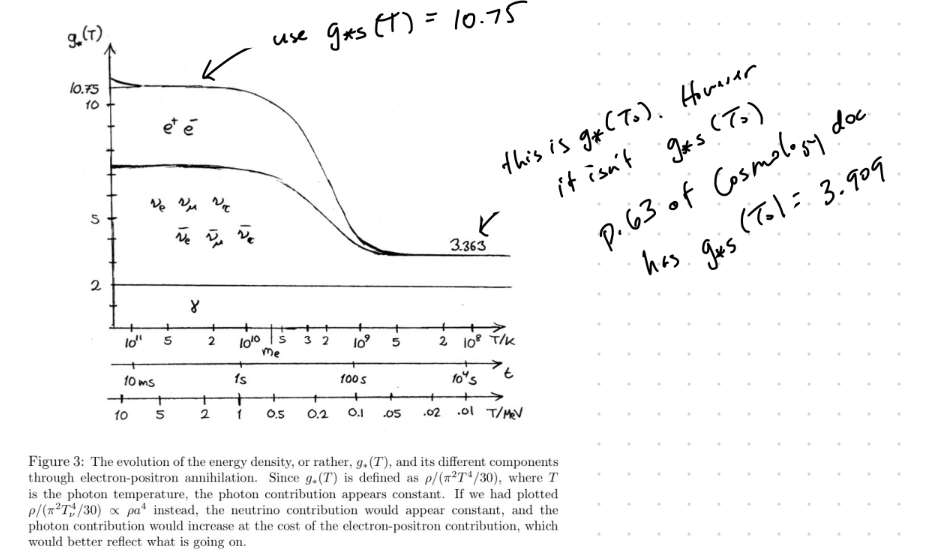

In [13]:
#you should get 4 times the number of eta values (so currently 4*3 = 12) outputs from this function. It returns the 
#thermodynamic equilibrium states of each element based on the temperature and eta values given.

def thermodynamic_equilibrium_calc(T, eta, Y_p, Y_n):    
    #for N and P
    mass_diff_n_p = 1.293
    n_p = np.e**(-mass_diff_n_p/T)
    X_n = n_p/(n_p+1)
    X_p = 1/(n_p+1)

    #for 2H, 4He, 7Li, 7Be:
    A = [2, 4, 7, 7]
    Z = [1, 2, 3, 4]
    B = [2.22, 28.3, 39.25, 37.6]
    g = [3, 1, 4, 4]
    m_N = kg_to_MeV(1.67e-27)
    zeta_3 = 1.20206 
    gs_T_T0_ratio = 10.75/3.909
    
    # Create blank array for thermodynamic equilibrium values based on temp and eta values
    X = np.zeros(len(A))

    #eta is a list of 3, there are 3 temperature strings that correlate with these eta values
    for i in range(len(Z)):
        epsolin = (1/(np.pi**2))*zeta_3*((2*np.pi*T/m_N)**(3/2))*eta*gs_T_T0_ratio
        pt1 = 0.5
        pt2 = Y_p**Z[i]
        pt3 = Y_n**(A[i]-Z[i])
        pt4 = g[i]
        pt5 = A[i]**(5/2)
        pt6 = epsolin**(A[i]-1)
        pt7 = np.e**(B[i]/T)
        X[i] = pt1*pt2*pt3*pt4*pt5*pt6*pt7
        
    X_2H = X[0]
    X_4He = X[1]
    X_7Li = X[2]
    X_7Be = X[3]
    
    return X_n, X_p, X_2H, X_4He, X_7Li, X_7Be

## Calculate thermodynamic equilibrium states for high eta values

$ X_i $ is a mass abundance. $ Y_p $ is also a mass abundance, so they should match in equilibrium. However, Deuterium plots are 2H/H, number abundances. In order to be able to compare the deuterium data from BBN to equilibrium we have to take this into account. Lithium and Berilium are also affected by this but their BBN output isn't close to their equilibrium point so we aren't focusing on them.

In [14]:
# take account for the factor of 2 hydrogen and convert to number abundance in the form of 2H/H which Y_p provides the
# number abundance for protons (H) and 1/2 x_2H provides number abundance of 2H

def thermo_equal_strings(temperature_str, Y_p_str, Y_n_str, Y_2H_str, Y_4He_str, Y_7Li_str, Y_Be7_str, eta_values):
    x_n_eq = np.zeros(len(temperature_str))
    x_p_eq = np.zeros(len(temperature_str))
    x_2H_eq = np.zeros(len(temperature_str))
    x_4He_eq = np.zeros(len(temperature_str))
    x_7Li_eq = np.zeros(len(temperature_str))
    x_7Be_eq = np.zeros(len(temperature_str))

    a = 0

    for g, w, m in zip(temperature_str, Y_p_str, Y_n_str):
        x_n_eq[a] = thermodynamic_equilibrium_calc(g, eta_values, w, m)[0]
        x_p_eq[a] = thermodynamic_equilibrium_calc(g, eta_values, w, m)[1]
        x_2H_eq[a] = 0.5*(thermodynamic_equilibrium_calc(g, eta_values, w, m)[2])/w
        x_4He_eq[a] = thermodynamic_equilibrium_calc(g, eta_values, w, m)[3]
        x_7Li_eq[a] = thermodynamic_equilibrium_calc(g, eta_values, w, m)[4]
        x_7Be_eq[a] = thermodynamic_equilibrium_calc(g, eta_values, w, m)[5]
        a += 1

    #print(a)    

    # ratio = observed/thermodynamic equilibrium
    ratio_n = Y_n_str/x_n_eq
    #print(ratio_n_high)
    ratio_p = Y_p_str/x_p_eq
    #print(ratio_p_high)
    ratio_2H = Y_2H_str/x_2H_eq
    #print(ratio_2H_high)
    ratio_4He = Y_4He_str/x_4He_eq
    ratio_7Li = Y_7Li_str/x_7Li_eq
    ratio_Be7 = Y_Be7_str/x_7Be_eq
    
    return x_n_eq, x_p_eq, x_2H_eq, x_4He_eq, x_7Li_eq, x_7Be_eq, ratio_n, ratio_p, ratio_2H, ratio_4He, ratio_7Li, ratio_Be7    

## For high $\eta$ values

In [15]:
x_n_eq_h, x_p_eq_h, x_2H_eq_h, x_4He_eq_h, x_7Li_eq_h, x_7Be_eq_h, ratio_n_high, ratio_p_high, ratio_2H_high, ratio_4He_high, ratio_7Li_high, ratio_Be7_high  = thermo_equal_strings(temperature_str_high, Y_p_str_high, Y_n_str_high, Y_2H_str_high, Y_4He_str_high, Y_7Li_str_high, Y_Be7_str_high, eta_value_high)

C:\Users\kathr\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in double_scalars
C:\Users\kathr\anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in true_divide


## For medium $\eta$ values

In [16]:
x_n_eq_m, x_p_eq_m, x_2H_eq_m, x_4He_eq_m, x_7Li_eq_m, x_7Be_eq_m, ratio_n_med, ratio_p_med, ratio_2H_med, ratio_4He_med, ratio_7Li_med, ratio_Be7_med  = thermo_equal_strings(temperature_str_med, Y_p_str_med, Y_n_str_med, Y_2H_str_med, Y_4He_str_med, Y_7Li_str_med, Y_Be7_str_med, eta_value_med)

C:\Users\kathr\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in double_scalars
C:\Users\kathr\anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\kathr\anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in true_divide


## For low $\eta$ values

In [17]:
x_n_eq_L, x_p_eq_L, x_2H_eq_L, x_4He_eq_L, x_7Li_eq_L, x_7Be_eq_L, ratio_n_low, ratio_p_low, ratio_2H_low, ratio_4He_low, ratio_7Li_low, ratio_Be7_low  = thermo_equal_strings(temperature_str_low, Y_p_str_low, Y_n_str_low, Y_2H_str_low, Y_4He_str_low, Y_7Li_str_low, Y_Be7_str_low, eta_value_low)

C:\Users\kathr\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in double_scalars
C:\Users\kathr\anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\kathr\anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in true_divide


## Plots of thermodynamic equilibrium vs outputs from varying eta values

When looking at these graphs keep in mind that they're a reflection of the temperatuer over time, the universe started out hot and cooled down, therefor the hotter temperatures are found at the beginning of the x-axis.

In [18]:
def generate_thermo_equal_plots():
    plt.figure()
    plt.loglog(temperature_str_high, x_n_eq_h, color = 'cornflowerblue', label = 'thermo equal')
    plt.loglog(temperature_str_high, Y_n_str_high, color = 'purple',label = '$\eta = 6.1x10^{-10}$')
    plt.loglog(temperature_str_med, x_n_eq_m, color = 'slateblue',  linestyle = '--', label = 'thermo equal')
    plt.loglog(temperature_str_med, Y_n_str_med, color = 'm', linestyle = '--', label = '$\eta = 3x10^{-10}$')
    plt.loglog(temperature_str_low, x_n_eq_L, color = 'darkslateblue', linestyle = ':', label = 'thermo equal')
    plt.loglog(temperature_str_low, Y_n_str_low, color = 'magenta', linestyle = ':', label = '$\eta = 1x10^{-10}$')
    plt.xlabel('Temperature (MeV)')
    plt.ylabel('Abundance of Neutrons: Y(n)')
    plt.title('Thermodynamic Equilibrium vs. BBN')
    plt.ylim(10**-16, 10**0)
    #plt.xlim(10e-1, 10e-4)
    plt.xlim(max(temperature_str_med), min(temperature_str_med)) # universe starts hot and cools down
    plt.legend()

    plt.figure()
    plt.loglog(temperature_str_high, x_p_eq_h, color = 'cornflowerblue', label = 'thermo equal')
    plt.loglog(temperature_str_high, Y_p_str_high, color = 'purple',label = '$\eta = 6.1x10^{-10}$')
    plt.loglog(temperature_str_med, x_p_eq_m, color = 'slateblue',  linestyle = '--', label = 'thermo equal')
    plt.loglog(temperature_str_med, Y_p_str_med, color = 'm', linestyle = '--', label = '$\eta = 3x10^{-10}$')
    plt.loglog(temperature_str_low, x_p_eq_L, color = 'darkslateblue', linestyle = ':', label = 'thermo equal')
    plt.loglog(temperature_str_low, Y_p_str_low, color = 'magenta', linestyle = ':', label = '$\eta = 1x10^{-10}$')
    plt.xlabel('Temperature (MeV)')
    plt.ylabel('Abundance of Protons: Y(p)')
    plt.title('Thermodynamic Equilibrium vs. BBN')
    plt.ylim(6*(10**-1), 9*(10**-1))
    plt.xlim(max(temperature_str_med), min(temperature_str_med))
    plt.legend(loc=0)
    
    plt.figure()
    plt.loglog(temperature_str_high, x_2H_eq_h, color = 'cornflowerblue', label = 'thermo equal')
    plt.loglog(temperature_str_high, Y_2H_str_high, color = 'purple',label = '$\eta = 6.1x10^{-10}$')
    plt.loglog(temperature_str_med, x_2H_eq_m, color = 'slateblue',  linestyle = '--', label = 'thermo equal')
    plt.loglog(temperature_str_med, Y_2H_str_med, color = 'm', linestyle = '--', label = '$\eta = 3x10^{-10}$')
    plt.loglog(temperature_str_low, x_2H_eq_L, color = 'darkslateblue', linestyle = ':', label = 'thermo equal')
    plt.loglog(temperature_str_low, Y_2H_str_low, color = 'magenta', linestyle = ':', label = '$\eta = 1x10^{-10}$')
    plt.xlabel('Temperature (MeV)')
    plt.ylabel('Abundance of Deutrium: Y(2H)')
    plt.title('Thermodynamic Equilibrium vs. BBN')
    plt.ylim(10**-13, 10**-3)
    plt.xlim(max(temperature_str_med), min(temperature_str_med))
    plt.legend(loc=0)
    
    plt.figure()
    plt.loglog(temperature_str_high, x_4He_eq_h, color = 'cornflowerblue', label = 'thermo equal')
    plt.loglog(temperature_str_high, Y_4He_str_high, color = 'purple',label = '$\eta = 6.1x10^{-10}$')
    plt.loglog(temperature_str_med, x_4He_eq_m, color = 'slateblue',  linestyle = '--', label = 'thermo equal')
    plt.loglog(temperature_str_med, Y_4He_str_med, color = 'm', linestyle = '--', label = '$\eta = 3x10^{-10}$')
    plt.loglog(temperature_str_low, x_4He_eq_L, color = 'darkslateblue', linestyle = ':', label = 'thermo equal')
    plt.loglog(temperature_str_low, Y_4He_str_low, color = 'magenta', linestyle = ':', label = '$\eta = 1x10^{-10}$')
    plt.xlabel('Temperature (MeV)')
    plt.ylabel('Abundance of Helium: Y(4He)')
    plt.title('Thermodynamic Equilibrium vs. BBN')
    plt.ylim(10**-29, 10**0)
    plt.xlim(max(temperature_str_med), min(temperature_str_med))
    plt.legend()
    
    plt.figure()
    plt.loglog(temperature_str_high, x_7Li_eq_h, color = 'cornflowerblue', label = 'thermo equal')
    plt.loglog(temperature_str_high, Y_7Li_str_high, color = 'purple',label = '$\eta = 6.1x10^{-10}$')
    plt.loglog(temperature_str_med, x_7Li_eq_m, color = 'slateblue', linestyle = '--', label = 'thermo equal')
    plt.loglog(temperature_str_med, Y_7Li_str_med, color = 'm', linestyle = '--', label = '$\eta = 3x10^{-10}$')
    plt.loglog(temperature_str_low, x_7Li_eq_L, color = 'darkslateblue', linestyle = ':', label = 'thermo equal')
    plt.loglog(temperature_str_low, Y_7Li_str_low, color = 'magenta', linestyle = ':', label = '$\eta = 1x10^{-10}$')
    plt.xlabel('Temperature (MeV)')
    plt.ylabel('Abundance of Lithium: Y(7Li)')
    plt.title('Thermodynamic Equilibrium vs. BBN')
    plt.ylim(10**-31, 10**-7)
    plt.xlim(max(temperature_str_med), min(temperature_str_med))
    plt.legend()
    
    plt.figure()
    plt.loglog(temperature_str_high, x_7Be_eq_h, color = 'cornflowerblue', label = 'thermo equal')
    plt.loglog(temperature_str_high, Y_Be7_str_high, color = 'purple',label = '$\eta = 6.1x10^{-10}$')
    plt.loglog(temperature_str_med, x_7Be_eq_m, color = 'slateblue',  linestyle = '--', label = 'thermo equal')
    plt.loglog(temperature_str_med, Y_Be7_str_med, color = 'm', linestyle = '--', label = '$\eta = 3x10^{-10}$')
    plt.loglog(temperature_str_low, x_7Be_eq_L, color = 'darkslateblue', linestyle = ':', label = 'thermo equal')
    plt.loglog(temperature_str_low, Y_Be7_str_low, color = 'magenta', linestyle = ':', label = '$\eta = 1x10^{-10}$')
    plt.xlabel('Temperature (MeV)')
    plt.ylabel('Abundance of Berilium: Y(Berilium)')
    plt.title('Thermodynamic Equilibrium vs. BBN')
    plt.xlim(10**-30, 10**-11)
    plt.ylim(10e-20, 10)
    plt.xlim(max(temperature_str_med), min(temperature_str_med))
    plt.legend(loc=0)

In [19]:
#generate_thermo_equal_plots()

## Ratio plots

In [20]:
def ratio_plots():
    plt.figure(figsize=(13,3))
    plt.subplot(131)
    plt.plot(temperature_str_high, ratio_n_high, color = 'hotpink', label = 'ratio high')
    plt.plot(temperature_str_med, ratio_n_med, color = 'purple', label = 'ratio med', linestyle = '--')
    plt.plot(temperature_str_low, ratio_n_low, color = 'orange', label = 'ratio low', linestyle = ':')
    plt.xlabel('Temperature (MeV)')
    plt.ylabel('Ratio')
    plt.title('Ratio plot for Neutrons over Temperature')
    plt.ylim(0.95, 1.1)
    plt.axhline(y = 1, color = 'r', linestyle = 'dashed', label = '1:1') 
    plt.xlim(max(temperature_str_med), min(temperature_str_med))
    #plt.xlim(1, 1.2)
    plt.legend()
    
    #plt.figure(figsize=(13,3))
    plt.subplot(133)
    plt.plot(temperature_str_high, ratio_p_high, color = 'hotpink', label = 'ratio high')
    plt.plot(temperature_str_med, ratio_p_med, color = 'purple', label = 'ratio med', linestyle = '--')
    plt.plot(temperature_str_low, ratio_p_low, color = 'orange', label = 'ratio low', linestyle = ':')
    plt.xlabel('Temperature (MeV)')
    plt.ylabel('Ratio')
    plt.title('Ratio plot for Protons over Temperature')
    plt.ylim(0.9, 1.02)
    plt.axhline(y = 1, color = 'r', linestyle = 'dashed', label = '1:1') 
    plt.xlim(max(temperature_str_med), min(temperature_str_med))
    #plt.xlim(10e-1, 10e-4)
    #plt.xlim(1, 1.2)
    plt.legend()
    
    plt.figure(figsize=(13,3))
    plt.subplot(131)
    plt.plot(temperature_str_high, ratio_2H_high, color = 'hotpink', label = 'ratio high')
    plt.plot(temperature_str_med, ratio_2H_med, color = 'purple', label = 'ratio med', linestyle = '--')
    plt.plot(temperature_str_low, ratio_2H_low, color = 'orange', label = 'ratio low', linestyle = ':')
    plt.xlabel('Temperature (MeV)')
    plt.ylabel('Ratio')
    plt.title('Ratio plot for Deutrium over Temperature')
    plt.ylim(0.6, 1.02)
    plt.axhline(y = 1, color = 'r', linestyle = 'dashed', label = '1:1') 
    plt.xlim(min(temperature_str_med), max(temperature_str_med))
    #plt.xlim(1, 1.2)
    plt.legend()
    
    #plt.figure()
    plt.subplot(133)
    plt.plot(temperature_str_high, ratio_7Li_high, color = 'hotpink', label = 'ratio high')
    plt.plot(temperature_str_med, ratio_7Li_med, color = 'purple', label = 'ratio med', linestyle = '--')
    plt.plot(temperature_str_low, ratio_7Li_low, color = 'orange', label = 'ratio low', linestyle = ':')
    plt.xlabel('Temperature (MeV)')
    plt.ylabel('Ratio')
    plt.title('Ratio plot for Lithium over Temperature')
    plt.ylim(0.9, 1.2)
    plt.axhline(y = 1, color = 'r', linestyle = 'dashed', label = '1:1') 
    plt.xlim(min(temperature_str_med), max(temperature_str_med))
    #plt.xlim(1, 2)
    plt.legend()
    
    plt.figure(figsize=(13,3))
    #plt.subplot(123)
    plt.plot(temperature_str_high, ratio_Be7_high, color = 'hotpink', label = 'ratio high')
    plt.plot(temperature_str_med, ratio_Be7_med, color = 'purple', label = 'ratio med', linestyle = '--')
    plt.plot(temperature_str_low, ratio_Be7_low, color = 'orange', label = 'ratio low', linestyle = ':')
    plt.xlabel('Temperature (MeV)')
    plt.ylabel('Ratio')
    plt.title('Ratio plot for Berilium over Temperature')
    plt.ylim(0.9, 1.2)
    plt.axhline(y = 1, color = 'r', linestyle = 'dashed', label = '1:1') 
    plt.xlim(min(temperature_str_med), max(temperature_str_med))
    #plt.xlim(1, 1.2)
    plt.legend()

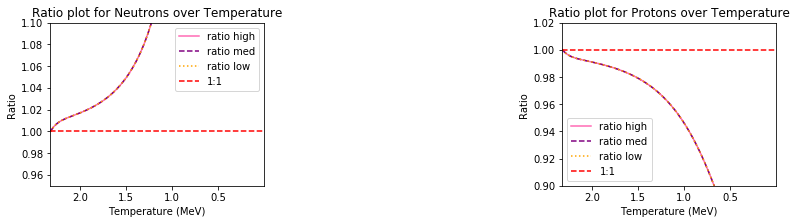

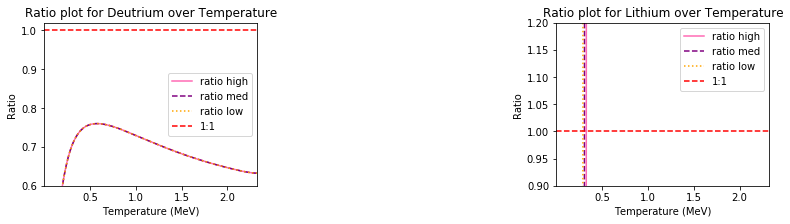

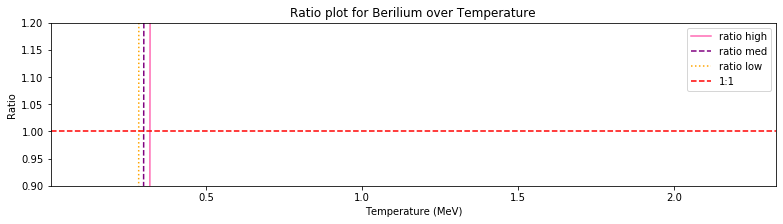

In [21]:
#ratio_plots()

## Replicate Cosmology I graphs and look at mass fractions over time (temperature)

In [22]:
def mass_frac_str(Y_n_str_high, Y_2H_str_high, Y_4He_str_high, Y_n_str_med, Y_2H_str_med, Y_4He_str_med):
    a = 0

    y_n_h = np.zeros(len(Y_n_str_high))
    y_2h_h = np.zeros(len(Y_2H_str_high))
    y_50_2h_h = np.zeros(len(Y_2H_str_high))
    y_4he_h = np.zeros(len(Y_4He_str_high))

    y_n_m = np.zeros(len(Y_n_str_med))
    y_2h_m = np.zeros(len(Y_2H_str_med))
    y_50_2h_m = np.zeros(len(Y_2H_str_med))
    y_4he_m = np.zeros(len(Y_4He_str_med))

    for i, j, k, l, m , n in zip(Y_n_str_high, Y_2H_str_high, Y_4He_str_high, Y_n_str_med, Y_2H_str_med, Y_4He_str_med):
        y_n_h[a] = 2*i #number fraction grouped together to show amount needed to make 4He
        y_2h_h[a] = 2*j    
        y_50_2h_h[a] = 2*50*j
        y_4he_h[a] = 4*k #number fraction to mass fraction 
        y_n_m[a] = 2*l #number fraction grouped together to show amount needed to make 4He
        y_2h_m[a] = 2*m    
        y_50_2h_m[a] = 2*50*m
        y_4he_m[a] = 4*n #number fraction to mass fraction 
        a += 1
        
    return y_n_h, y_2h_h, y_50_2h_h, y_4he_h, y_n_m, y_2h_m, y_50_2h_m, y_4he_m

In [23]:
y_n_h, y_2h_h, y_50_2h_h, y_4he_h, y_n_m, y_2h_m, y_50_2h_m, y_4he_m = mass_frac_str(Y_n_str_high, Y_2H_str_high, Y_4He_str_high, Y_n_str_med, Y_2H_str_med, Y_4He_str_med)

In [24]:
def CompareHighMedMassFrac():   
    plt.figure()
    plt.plot(temperature_str_high, y_2h_h, color = 'purple', linestyle  = ':', label = '2H')
    plt.plot(temperature_str_high, y_n_h, color = 'rebeccapurple', label = '2 x n')
    plt.plot(temperature_str_high, y_50_2h_h, color = 'mediumorchid', label = '50 x 2H')
    plt.plot(temperature_str_high, y_4he_h, color  = 'darkmagenta', label = '4He')
    plt.plot(temperature_str_med, y_2h_m, color = 'teal', linestyle  = ':', label = '2H')
    plt.plot(temperature_str_med, y_n_m, color = 'cyan', label = '2 x n')
    plt.plot(temperature_str_med, y_50_2h_m, color = 'aquamarine', label = '50 x 2H')
    plt.plot(temperature_str_med, y_4he_m, color  = 'mediumseagreen', label = '4He')
    plt.xlim(100*10**-3, 60*10**-3) # original graph was in keV from 100 to 60
    plt.ylim(0, 0.31)
    plt.xlabel('Temperature (MeV)')
    plt.ylabel('Abundance')
    plt.title('Comparing neutron to helium mass fractions')
    plt.legend()
    

In [25]:
def CompareHighMedMassFrac_seperate_plots():    
    plt.figure(figsize=(13,3))
    plt.subplot(131)
    plt.plot(temperature_str_high, y_2h_h, color = 'purple', linestyle  = ':', label = '2H')
    plt.plot(temperature_str_high, y_n_h, color = 'rebeccapurple', label = '2 x n')
    plt.plot(temperature_str_high, y_50_2h_h, color = 'mediumorchid', label = '50 x 2H')
    plt.plot(temperature_str_high, y_4he_h, color  = 'darkmagenta', label = '4He')
    plt.xlim(100*10**-3, 60*10**-3) # original graph was in keV from 100 to 60
    plt.ylim(0, 0.31)
    plt.xlabel('Temperature (MeV)')
    plt.ylabel('Abundance')
    plt.title('Comparing neutron to helium mass fractions')
    plt.legend()

    plt.subplot(133)
    plt.plot(temperature_str_med, y_2h_m, color = 'teal', linestyle  = ':', label = '2H')
    plt.plot(temperature_str_med, y_n_m, color = 'cyan', label = '2 x n')
    plt.plot(temperature_str_med, y_50_2h_m, color = 'aquamarine', label = '50 x 2H')
    plt.plot(temperature_str_med, y_4he_m, color  = 'mediumseagreen', label = '4He')
    plt.xlim(100*10**-3, 60*10**-3) # original graph was in keV from 100 to 60
    plt.ylim(0, 0.31)
    plt.xlabel('Temperature (MeV)')
    plt.ylabel('Abundance')
    plt.title('Comparing neutron to helium mass fractions')
    plt.legend()
    plt.show()

**For plots - purples : $\eta$ = $6.1x10^{-10}$ , greens : $\eta$ = $3x10^{-10}$**

In [26]:
#CompareHighMedMassFrac_seperate_plots()
#CompareHighMedMassFrac()

As $\eta$ decreases, neutron production declines later meaning there's less neutrons when it decreases, and deutrium production occurs later, then there's less helium overall because there's less neutrons when deuterium starts forming 

In [27]:
def Li_Be():
    plt.figure()
    plt.loglog(temperature_str_high, Y_7Li_str_high, color = 'darkgreen', label = '${}^7$ Lithium high')
    plt.loglog(temperature_str_med, Y_7Li_str_med, color = 'mediumseagreen', linestyle = '--', label = '${}^7$ Lithium med')
    plt.loglog(temperature_str_low, Y_7Li_str_low, color = 'forestgreen', linestyle = ':', label = '${}^7$ Lithium low')
    plt.loglog(temperature_str_high, Y_Be7_str_high, color = 'orangered', label = '${}^7$ Beryllium high')
    plt.loglog(temperature_str_med, Y_Be7_str_med, color = 'tomato', linestyle = '--', label = '${}^7$ Beryllium med')
    plt.loglog(temperature_str_low, Y_Be7_str_low, color = 'salmon', linestyle = ':', label = '${}^7$ Beryllium low')
    plt.xlim(100*10**-3, 60*10**-3) # original graph was in keV from 100 to 60
    plt.ylim(0, 0.31)
    plt.xlabel('Temperature (MeV)')
    plt.ylabel('Abundance')
    plt.title('Comparing Lithium and Berilium mass fractions')
    plt.legend()

In [28]:
def Li_Be_seperate_plots():
    plt.figure(figsize=(13,3))
    plt.subplot(131)
    plt.loglog(temperature_str_high, Y_7Li_str_high, color = 'darkgreen', label = '${}^7$ Lithium high')
    plt.loglog(temperature_str_med, Y_7Li_str_med, color = 'mediumseagreen', linestyle = '--', label = '${}^7$ Lithium med')
    plt.loglog(temperature_str_low, Y_7Li_str_low, color = 'forestgreen', linestyle = ':', label = '${}^7$ Lithium low')
    plt.xlim(100*10**-3, 60*10**-3) # original graph was in keV from 100 to 60
    plt.ylim(0, 0.31)
    plt.xlabel('Temperature (MeV)')
    plt.ylabel('Abundance')
    plt.title('Comparing Lithium mass fractions')
    plt.legend()

    plt.subplot(133)
    plt.loglog(temperature_str_high, Y_Be7_str_high, color = 'orangered', label = '${}^7$ Beryllium high')
    plt.loglog(temperature_str_med, Y_Be7_str_med, color = 'tomato', linestyle = '--', label = '${}^7$ Beryllium med')
    plt.loglog(temperature_str_low, Y_Be7_str_low, color = 'salmon', linestyle = ':', label = '${}^7$ Beryllium low')
    plt.xlim(100*10**-3, 60*10**-3) # original graph was in keV from 100 to 60
    plt.ylim(0, 0.31)
    plt.xlabel('Temperature (MeV)')
    plt.ylabel('Abundance')
    plt.title('Comparing Lithium mass fractions')
    plt.legend()
    plt.show()

In [29]:
#Li_Be_seperate_plots()
#Li_Be()